In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/TrainingByPackt/Data-Science-with-Python/master/Chapter01/Data/Wholesale%20customers%20data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


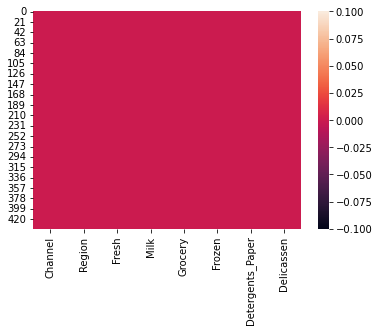

In [3]:
import seaborn as sns
sns.heatmap(df.isnull())

In [4]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
df_new=SC.fit_transform(df)
df_1=pd.DataFrame(df_new)
df_1.head()

,0,1,2,3,4,5,6,7
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


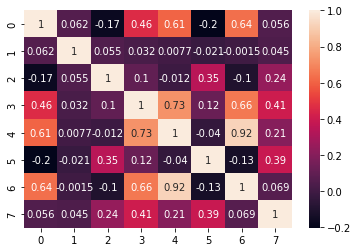

In [5]:
sns.heatmap(df_1[df_1.corr().index].corr(),annot=True)

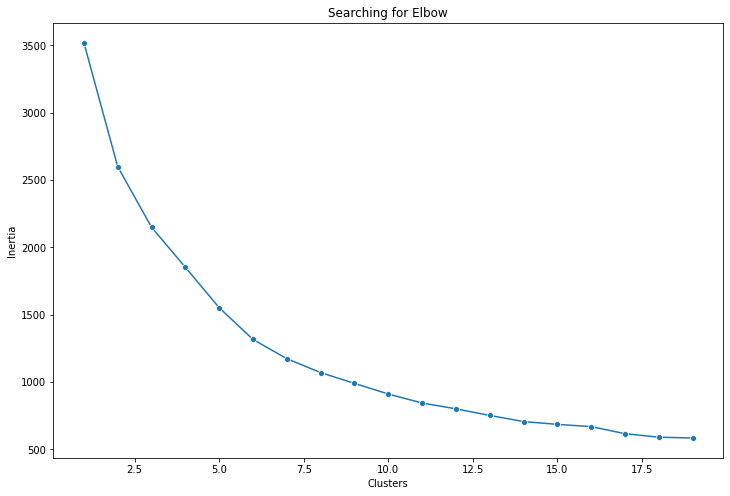

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
clusters=[]
for i in range(1,20):
    model = KMeans(n_clusters=i,
               init='k-means++')

    model.fit(df_1)
    clusters.append(model.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 20)), y=clusters, ax=ax,marker='o')
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')
plt.show()

In [7]:
model = KMeans(n_clusters=7,
               init='k-means++')

model.fit(df_1)

KMeans(n_clusters=7)

In [9]:
print(model.inertia_,model.cluster_centers_)

1189.8846881034979 [[-5.67368999e-01 -1.59406464e+00 -1.24731213e-01 -3.44929815e-01
  -3.95157722e-01  8.58766263e-03 -4.14431013e-01 -1.60385560e-01]
 [ 1.44865163e+00  4.25603791e-01 -2.17905348e-01  2.14684220e-01
   3.55564802e-01 -3.54937120e-01  3.79954256e-01 -3.45627588e-02]
 [-6.90297086e-01  5.90668285e-01 -2.26969330e-01 -3.81612608e-01
  -4.75234627e-01 -1.72435121e-01 -4.42861386e-01 -1.86419955e-01]
 [-6.41684615e-01  2.96803467e-01  1.85207767e+00 -1.21167244e-01
  -2.56501081e-01  1.50528146e+00 -4.24700289e-01  4.17348779e-01]
 [-6.90297086e-01  5.90668285e-01  1.96681731e+00  5.17550306e+00
   1.28721685e+00  6.90059988e+00 -5.54861977e-01  1.64784475e+01]
 [ 1.44865163e+00 -5.22752861e-01 -4.86817191e-01  1.33387260e+00
   1.68091661e+00 -2.71711486e-01  1.74518188e+00  3.43321366e-01]
 [ 1.44865163e+00  3.75167418e-01  7.40104506e-01  4.60039794e+00
   5.36363652e+00 -1.79261215e-01  5.48784726e+00  3.44218728e-01]]
